In [12]:
import wandb

api = wandb.Api()
runs = api.runs("clm96-cam/LoRA_Qwen")
for x in runs:
    if x.name == "default_lora":
        run = x

history_df = run.history()

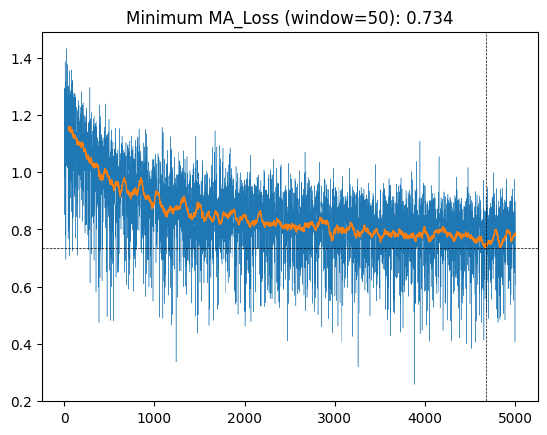

In [77]:
import matplotlib.pyplot as plt


window = 50
lossdf = history_df[["loss", "_step"]].rename(columns={"_step": "step"})
lossdf["moving_avg_loss"] = lossdf["loss"].rolling(window=window).mean()
_, step, min_ma_loss = lossdf.nsmallest(1, "moving_avg_loss").iloc[0].to_dict().values()

line_kwargs = dict(color="k", ls="--", lw=0.5)

plt.title(f"Minimum MA_Loss (window={window}): {min_ma_loss:.3g}")
plt.plot(lossdf["step"], lossdf["loss"], alpha=1, lw=0.3)
plt.plot(lossdf["step"], lossdf["moving_avg_loss"], lw=1)
plt.axvline(step, **line_kwargs)
plt.axhline(min_ma_loss, **line_kwargs)

plt.show();